<a href="https://colab.research.google.com/github/sakathia/DATA201/blob/main/Project_2_Linear_Regression_EV_DOL_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Electric Vehicle Registrations in WA

## Introduction:

This dataset tracks the number of vehicles registered each month in Washington State, broken down by county for both passenger vehicles and trucks. The data comes from the Washington State Department of Licensing (DOL), which combines its registration data with fuel efficiency ratings from the Environmental Protection Agency (EPA) and data from the National Highway Traffic Safety Administration (NHTSA). We picked this dataset because we were curious about the trends in vehicle registrations and how they differ across counties in Washington.


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [7]:
orig_data = "/content/Electric_Vehicle_Population_Size_History_By_County.csv"
Electric = pd.read_csv(orig_data)
Electric.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,November 30 2021,Douglas,CO,Passenger,1,1,2,93,95,2.11
1,January 31 2023,Plaquemines,LA,Passenger,1,1,2,20,22,9.09
2,August 31 2020,Loudoun,VA,Passenger,1,0,1,83,84,1.19
3,August 31 2017,Mason,WA,Truck,0,0,0,19330,19330,0.00
4,June 30 2022,Lee,FL,Passenger,1,0,1,45,46,2.17


In [21]:
Electric = Electric.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEVs",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEVs",
    "Non-Electric Vehicle Total": "Non Evs Total",
    "Electric Vehicle (EV) Total": "Total Evs"})

In [81]:
Electric.columns

Index(['Date', 'County', 'State', 'Vehicle Primary Use', 'BEVs', 'PHEVs',
       'Total Evs', 'Non Evs Total', 'Total Vehicles',
       'Percent Electric Vehicles', 'Month', 'Day', 'Year'],
      dtype='object')

In [18]:
#Removing NAs
Electric = Electric.dropna()


In [22]:
Electric.isnull().sum()

,0
Date,0
County,0
State,0
Vehicle Primary Use,0
BEVs,0
PHEVs,0
Total Evs,0
Non Evs Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [23]:
Electric['Date'] = pd.to_datetime(Electric['Date'])

# Create new columns for Month, Day, and Year
Electric['Month'] = Electric['Date'].dt.month_name()  # Full month name
Electric['Day'] = Electric['Date'].dt.day
Electric['Year'] = Electric['Date'].dt.year

Electric['Date'] = pd.to_datetime(Electric['Date'])
print(Electric[["Date", "Year", "Month"]].head())

        Date  Year     Month
0 2021-11-30  2021  November
1 2023-01-31  2023   January
2 2020-08-31  2020    August
3 2017-08-31  2017    August
4 2022-06-30  2022      June


In [24]:
Electric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26387 entries, 0 to 26485
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       26387 non-null  datetime64[ns]
 1   County                     26387 non-null  object        
 2   State                      26387 non-null  object        
 3   Vehicle Primary Use        26387 non-null  object        
 4   BEVs                       26387 non-null  int64         
 5   PHEVs                      26387 non-null  int64         
 6   Total Evs                  26387 non-null  int64         
 7   Non Evs Total              26387 non-null  int64         
 8   Total Vehicles             26387 non-null  int64         
 9   Percent Electric Vehicles  26387 non-null  float64       
 10  Month                      26387 non-null  object        
 11  Day                        26387 non-null  int32         
 12  Year     

In [25]:
Electric.describe()

,Date,BEVs,PHEVs,Total Evs,Non Evs Total,Total Vehicles,Percent Electric Vehicles,Day,Year
count,26387,26387.000000,26387.000000,26387.000000,2.638700e+04,2.638700e+04,26387.000000,26387.000000,26387.000000
mean,2021-07-26 17:59:16.614999808,252.872286,85.226665,338.098950,2.273484e+04,2.307294e+04,4.746233,30.428090,2021.038314
min,2017-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,28.000000,2017.000000
25%,2019-08-31 00:00:00,0.000000,0.000000,1.000000,3.600000e+01,3.700000e+01,0.490000,30.000000,2019.000000
50%,2021-09-30 00:00:00,1.000000,0.000000,1.000000,1.220000e+02,1.250000e+02,1.590000,31.000000,2021.000000
75%,2023-07-31 00:00:00,3.000000,1.000000,4.000000,5.581000e+03,5.582000e+03,4.000000,31.000000,2023.000000
max,2025-03-31 00:00:00,93335.000000,22027.000000,115362.000000,1.398963e+06,1.430060e+06,100.000000,31.000000,2025.000000
std,NaN,2831.579428,748.144836,3570.482806,1.014733e+05,1.042425e+05,11.226481,0.834848,2.319610


In [37]:
Electric.shape

(26387, 13)

In [43]:
Electric_WA = Electric[Electric['State'] == 'WA']

In [44]:
Electric_WA.shape

(7722, 13)

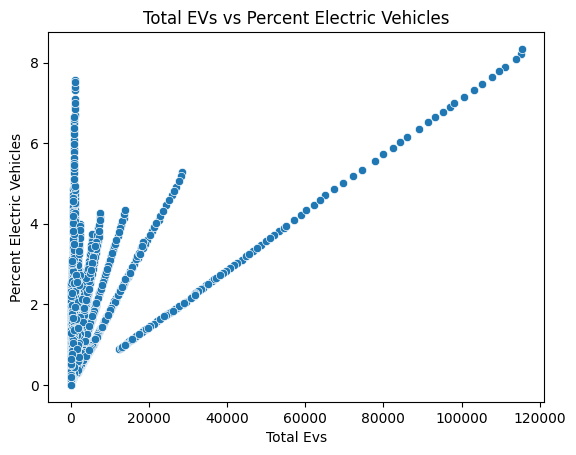

In [80]:
sns.scatterplot(data=Electric_WA, x='Total Evs', y='Percent Electric Vehicles')
plt.title("Total EVs vs Percent Electric Vehicles")
plt.show()

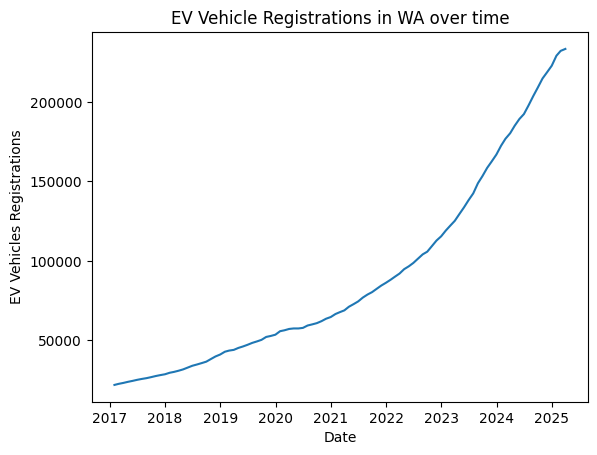

In [60]:
monthly_totals = Electric_WA.groupby('Date')['Total Evs'].sum().reset_index()
sns.lineplot(data=monthly_totals, x='Date', y='Total Evs')
plt.title('EV Vehicle Registrations in WA over time')
plt.xlabel('Date')
plt.ylabel('EV Vehicles Registrations')
plt.show()

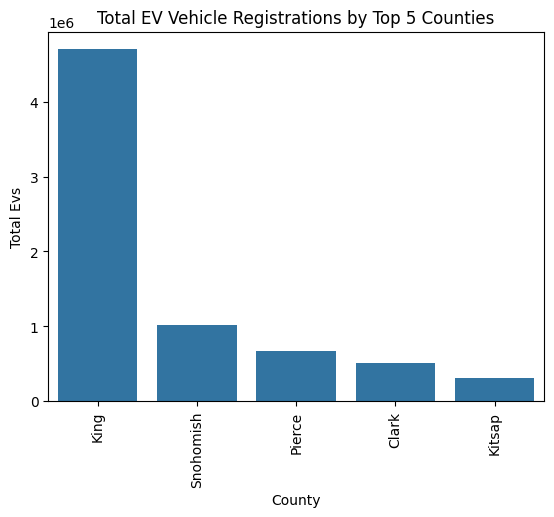

In [65]:
county_EVtotals = Electric_WA.groupby('County')['Total Evs'].sum().reset_index().sort_values(by='Total Evs', ascending=False).head(5)
sns.barplot(data=county_EVtotals, x='County', y='Total Evs')
plt.xticks(rotation=90)
plt.title('Total EV Vehicle Registrations by Top 5 Counties')
plt.show()

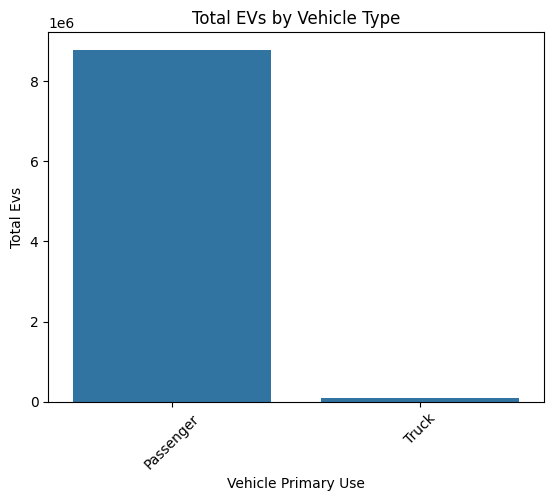

In [64]:
EV_vehicles_Type=Electric_WA.groupby('Vehicle Primary Use')['Total Evs'].sum().reset_index()

sns.barplot(data=EV_vehicles_Type, x='Vehicle Primary Use', y='Total Evs')
plt.title('Total EVs by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

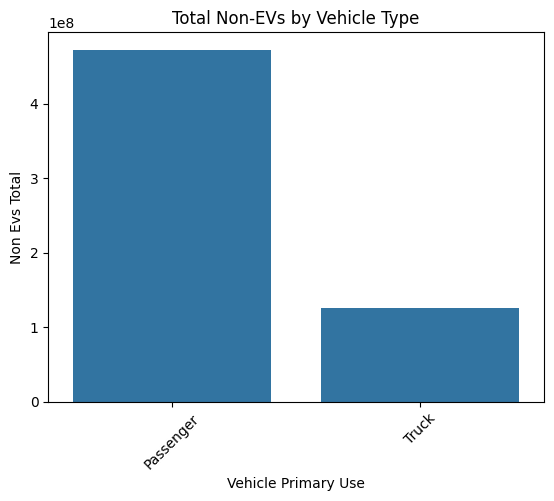

In [67]:
Non_EV_vehicles_Type=Electric_WA.groupby('Vehicle Primary Use')['Non Evs Total'].sum().reset_index()

sns.barplot(data=Non_EV_vehicles_Type, x='Vehicle Primary Use', y='Non Evs Total')
plt.title('Total Non-EVs by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

## Linear Regression : Predicting Electric Vehicle Percentages

In [112]:
Elec_Pred_perc= Electric_WA[['Total Vehicles', 'BEVs', 'PHEVs', 'Non Evs Total', 'Year']]
X = Elec_Pred_perc.values
y = Electric_WA["Percent Electric Vehicles"].values

In [113]:
X.shape

(7722, 5)

In [114]:
y.shape

(7722,)

In [115]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

We instantiate the linear regression

In [118]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [119]:
X_train.shape, y_train.shape

((5405, 5), (5405,))

In [120]:
X_test.shape, y_test.shape

((2317, 5), (2317,))

We fit the training data to a linear model

In [121]:
LinReg.fit(X_train, y_train)

LinearRegression()

We use the model to predict the test data

In [122]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [123]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

0.40002101437468923


Let us use sklearn metrics next

In [124]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.40002101437468923


What is the error on the training data

In [125]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

0.4613552446353762


In [ ]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [126]:
LinReg.score(X_test, y_test)

0.45559567705714954

This means that Total Vehicles, BEVs, PHEVs, Non Evs Total,
and Year explains about 45.5% of the average percent of electric vehicles.

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([1.490e+02, 1.534e+03, 5.080e+02, 8.500e+01, 1.700e+01, 1.100e+01,
        5.000e+00, 1.000e+00, 5.000e+00, 2.000e+00]),
 array([-1.42169553, -0.63497654,  0.15174245,  0.93846144,  1.72518043,
         2.51189942,  3.29861841,  4.0853374 ,  4.87205639,  5.65877538,
         6.44549438]),
 <BarContainer object of 10 artists>)

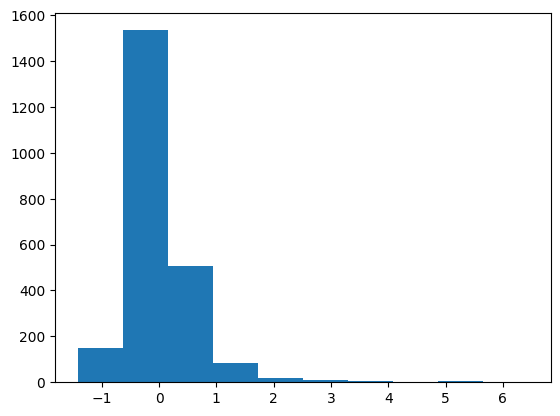

In [127]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

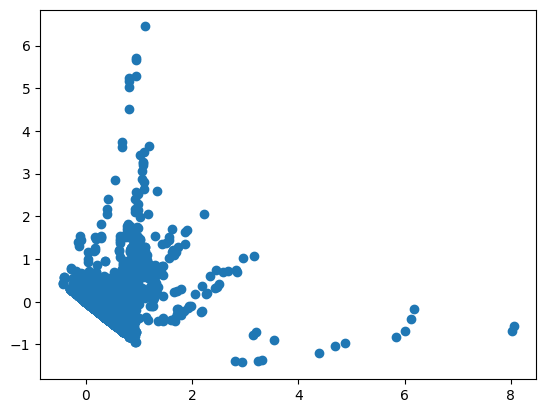

In [128]:
plt.scatter(y_predicted, y_test - y_predicted)

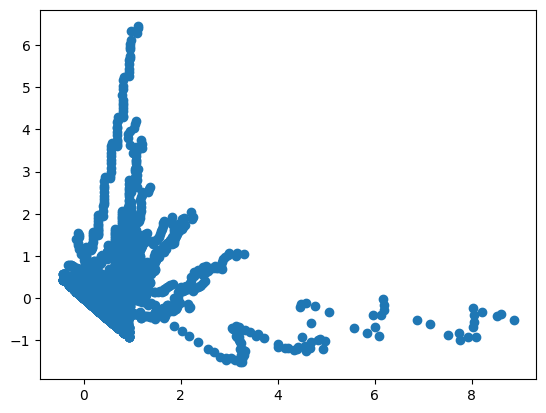

In [129]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

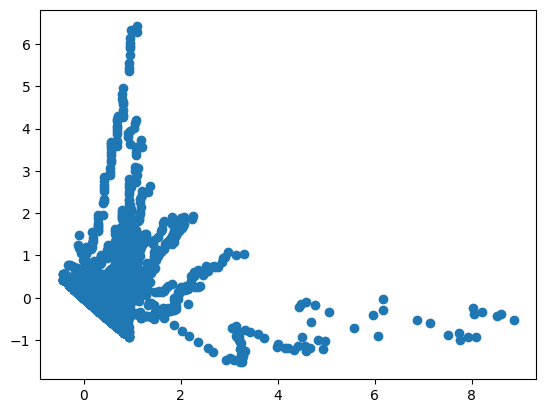

In [130]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [131]:
print(LinReg.coef_)


[ 0.00034413 -0.00061496  0.00130568 -0.0003466   0.11249561]


In [132]:
print(LinReg.intercept_)

-226.86239675684467
